In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

Kode diatas merupakan library atau modul yang sering digunakan dalam berbagai tugas pemrograman, terutama yang berhubungan dengan pengolahan citra, analisis data, dan visualisasi. Modul `cv2` adalah OpenCV, yang digunakan untuk pengolahan citra dan video. Modul `numpy` (`np`) menyediakan dukungan untuk array besar multidimensi serta berbagai fungsi matematika tingkat tinggi untuk operasi pada array tersebut. Modul `matplotlib.pyplot` (`plt`) digunakan untuk membuat visualisasi data dalam bentuk grafik. Modul `pandas` (`pd`) digunakan untuk analisis data yang efisien dan manipulasi struktur data seperti DataFrame. Modul `os` menyediakan berbagai fungsi untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori. Terakhir, modul `math` digunakan untuk melakukan operasi matematika dasar seperti fungsi trigonometri, logaritma, dan lainnya. Kode ini menunjukkan persiapan untuk tugas yang melibatkan pengolahan dan visualisasi data yang kompleks.

In [2]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("Finger/"+label): 
            img = cv2.imread(os.path.join("Finger/"+label,filename)) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                # Pastikan gambar memiliki 3 saluran warna (RGB)
                if img.shape[2] == 4:
                    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
                
                # Mendapatkan dimensi gambar
                height, width, _ = img.shape
                
                # Menyesuaikan ukuran gambar menjadi 150x150 secara manual
                if height > 150 or width > 150:
                    if height > width:
                        scale_factor = 150 / height
                    else:
                        scale_factor = 150 / width
                    new_height = int(height * scale_factor)
                    new_width = int(width * scale_factor)
                    resized_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)
                    for i in range(new_height):
                        for j in range(new_width):
                            resized_img[i, j, :] = img[int(i / scale_factor), int(j / scale_factor), :]
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - new_height) // 2
                    start_col = (150 - new_width) // 2
                    padded_img[start_row:start_row+new_height, start_col:start_col+new_width] = resized_img
                else:
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - height) // 2
                    start_col = (150 - width) // 2
                    padded_img[start_row:start_row+height, start_col:start_col+width] = img
                
                images.append(padded_img) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("Finger")

Kode diatas adalah Fungsi `insertGambar` digunakan untuk membaca gambar-gambar dari direktori yang diberikan dan mengatur ulang ukuran gambar-gambar tersebut agar sesuai dengan dimensi yang diinginkan, yaitu 150x150 piksel. Pertama, fungsi ini membuat tiga list kosong: `images`, `filenames`, dan `labels` untuk menyimpan gambar, nama file, dan label masing-masing. Selanjutnya, fungsi akan melakukan iterasi melalui setiap label di dalam folder yang diberikan. Untuk setiap label, fungsi akan membaca setiap file gambar di dalam direktori `Finger/` yang sesuai dengan label tersebut. Gambar kemudian dibaca menggunakan OpenCV (`cv2`) dan dimasukkan ke dalam `images` bersama dengan nama file dan labelnya. Sebelum gambar dimasukkan, ukuran gambar disesuaikan jika melebihi ukuran 150x150 piksel, dan jika tidak, gambar akan dipadankan dengan nol untuk mencapai ukuran yang diinginkan. Akhirnya, fungsi mengembalikan tiga list yang berisi gambar-gambar yang telah diatur ulang, nama file, dan labelnya.

In [3]:
def eksplorasiData(images, labels):
    # Jumlah data
    print(f"Jumlah total gambar: {len(images)}")
    
    if len(images) == 0:
        print("Tidak ada gambar yang ditemukan.")
        return
    
    # Distribusi data per label
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    print("Distribusi data per label:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")
    
    # Menampilkan histogram distribusi data
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xlabel('Label')
    plt.ylabel('Jumlah Gambar')
    plt.title('Distribusi Data per Label')
    plt.xticks(rotation=45)
    plt.show()
    
    # Menampilkan sampel data
    num_samples = min(9, len(images))  # Menyesuaikan jumlah sampel jika gambar kurang dari 9
    if num_samples > 0:
        sample_indices = np.random.choice(range(len(images)), num_samples, replace=False)
        plt.figure(figsize=(15, 5))
        for i, idx in enumerate(sample_indices):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
            plt.title(f"Label: {labels[idx]}")
            plt.axis('off')
        plt.show()
    else:
        print("Tidak ada gambar yang cukup untuk ditampilkan sebagai sampel.")

Kode diatas adalah Fungsi `eksplorasiData` bertujuan untuk menganalisis dan memvisualisasikan data gambar yang dimasukkan. Pertama-tama, fungsi mencetak jumlah total gambar yang dimasukkan. Jika tidak ada gambar yang ditemukan, akan dicetak pesan yang sesuai. Selanjutnya, fungsi menghitung distribusi data per label dengan menghitung berapa banyak gambar yang termasuk dalam setiap label dan mencetaknya. Untuk memvisualisasikan distribusi data, fungsi membuat histogram yang menunjukkan jumlah gambar per label. Setelah itu, fungsi memilih beberapa sampel data secara acak untuk ditampilkan. Jika jumlah sampel lebih dari 0, fungsi akan menampilkan sampel gambar beserta labelnya. Jika tidak ada gambar yang cukup untuk ditampilkan sebagai sampel, akan dicetak pesan yang sesuai. Ini membantu pengguna untuk memahami sebaran data gambar dan juga memberikan pemahaman visual tentang jenis gambar yang ada dalam set data.

Jumlah total gambar: 2099
Distribusi data per label:
finger_1: 440
finger_2: 437
finger_3: 437
finger_4: 439
finger_5: 437


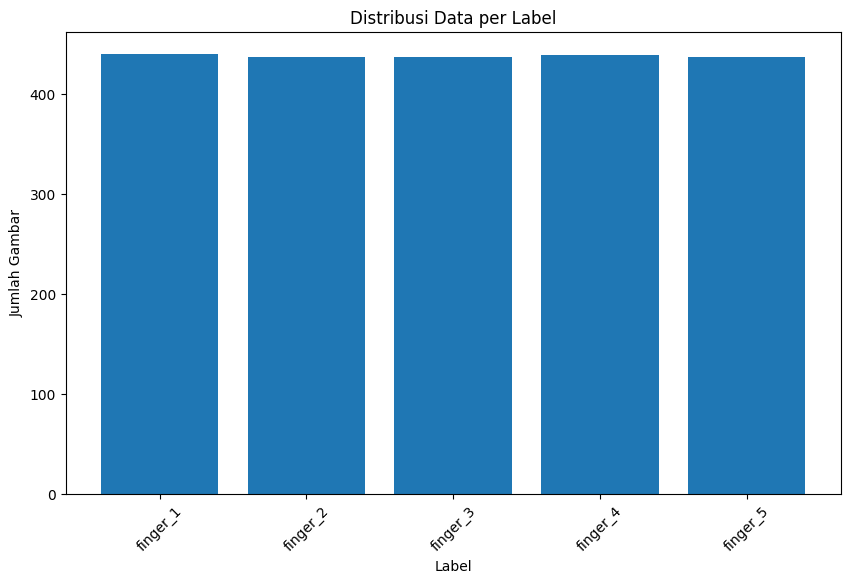

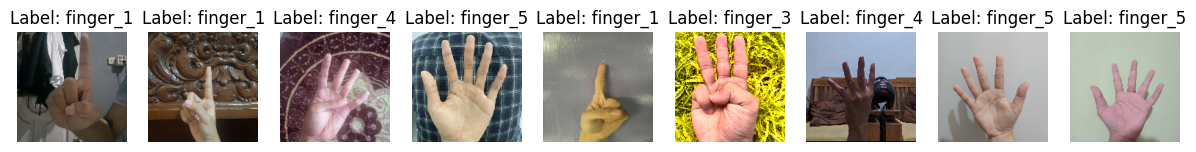

Label: finger_1


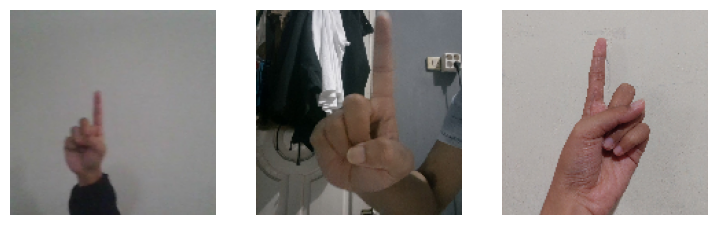

Label: finger_2


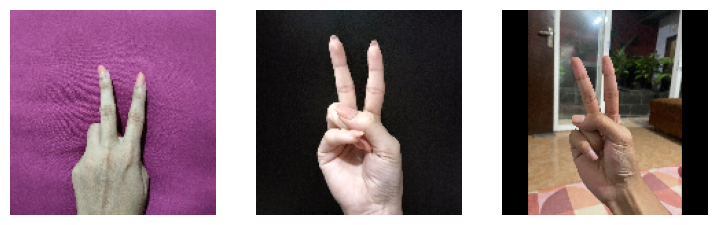

Label: finger_3


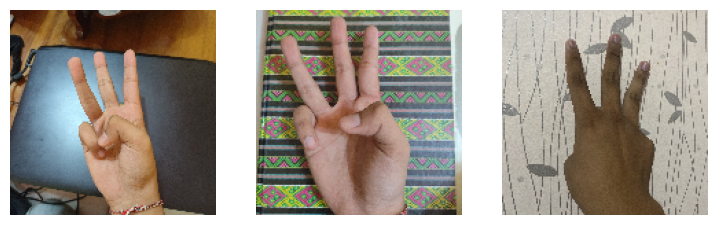

Label: finger_4


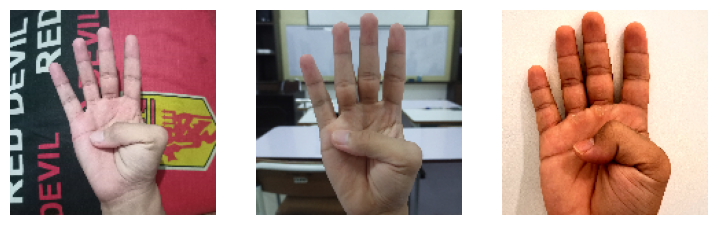

Label: finger_5


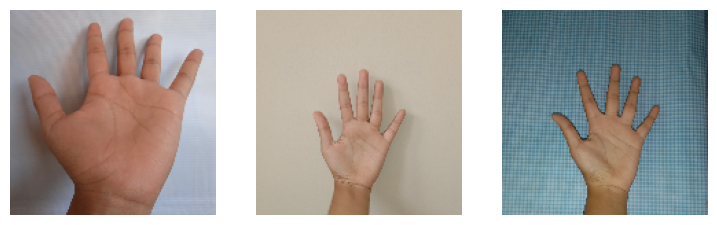

In [4]:
def display_samples(images, labels, num_samples=3):
    unique_folders = ["Finger/finger_1",
                      "Finger/finger_2",
                      "Finger/finger_3",
                      "Finger/finger_4",
                      "Finger/finger_5"]

    for folder in unique_folders:
        label = folder.split("/")[-1]  # Ambil label dari nama folder
        label_indices = [i for i in range(len(labels)) if labels[i] == label]
        num_samples = min(num_samples, len(label_indices))
        if num_samples == 0:
            print(f"Tidak ada gambar untuk label: {label}")
            continue
        print(f"Label: {label}")
        plt.figure(figsize=(num_samples * 3, 3))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[label_indices[i]], cv2.COLOR_BGR2RGB))
            plt.axis('off')
        plt.show()

# Contoh penggunaan
folder_path = "Finger"
images, filenames, labels = insertGambar(folder_path)
eksplorasiData(images, labels)
# Tampilkan 3 sampel gambar dari setiap kategori label
display_samples(images, labels, num_samples=3)

Kode diatas adalah Fungsi `display_samples` digunakan untuk menampilkan sampel gambar dari setiap kategori label yang diberikan. Pertama, fungsi membuat daftar unik dari folder yang mengandung gambar dengan label yang berbeda. Selanjutnya, fungsi melakukan iterasi melalui setiap folder unik. Untuk setiap folder, labelnya diambil dari nama folder tersebut. Kemudian, indeks-indeks gambar yang sesuai dengan label tersebut diambil dari daftar label. Jumlah sampel yang akan ditampilkan diatur menjadi minimum antara jumlah sampel yang diminta dan jumlah gambar yang tersedia untuk label tersebut. Jika tidak ada gambar untuk label tertentu, akan dicetak pesan yang sesuai. Selanjutnya, untuk setiap label, sampel gambar yang sesuai ditampilkan dalam satu baris subplot. Ini membantu pengguna untuk melihat representasi visual dari beberapa sampel gambar dari setiap kategori label yang ada dalam data.

#### Preprocessing n

Perpindahan untuk setiap gambar (x, y): [(49.31276117674332, -26.255855716733066), (38.43486695334225, -22.047733105958656), (12.20716719330531, -29.145540889576495), (17.399087694223823, -27.699690133824795), (35.84740732002919, 4.334910311120879), (-30.481335728456393, 31.12824910018962), (-24.28891653882771, -41.195961502848874), (18.238555648752822, -40.70836489619), (-45.36338326030126, -17.703957895995806), (1.8996789656647977, 36.886960527138015), (30.948113048005595, 45.5160215072501), (-45.73722977991462, -15.036211981562374), (-32.38636671763211, 44.59243135869309), (-11.623922493430108, 10.211753178062231), (30.53768659350824, -23.487238790671437), (26.780107626099408, -39.31760521434635), (27.136886644467523, -4.391126737876718), (21.186924180506367, -38.211622135115846), (-17.889628638719465, 47.886065744517865), (-5.724344554249939, 19.324046069575587), (-5.75906138868929, 29.356446137185372), (-40.5212831305887, -9.886508252065617), (13.234813425005918, 38.32920392848611

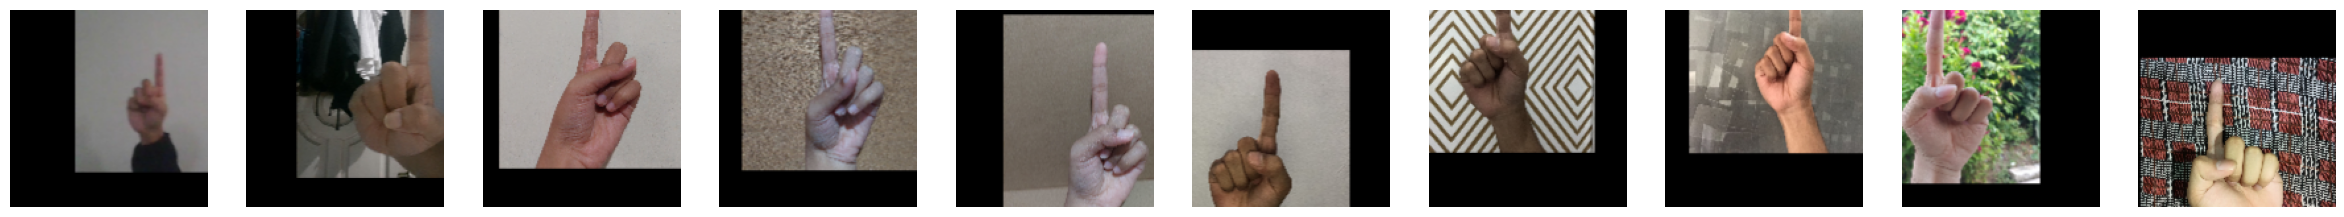

Label: finger_2


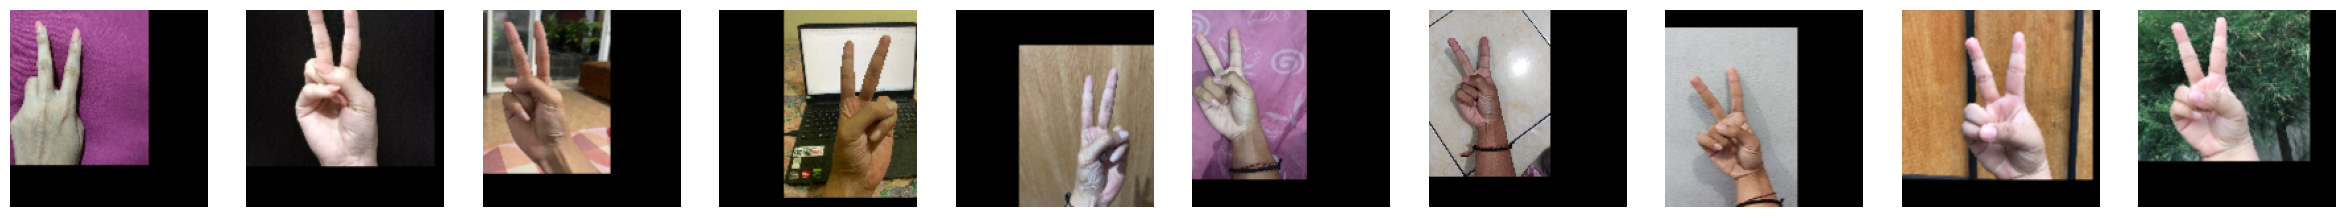

Label: finger_3


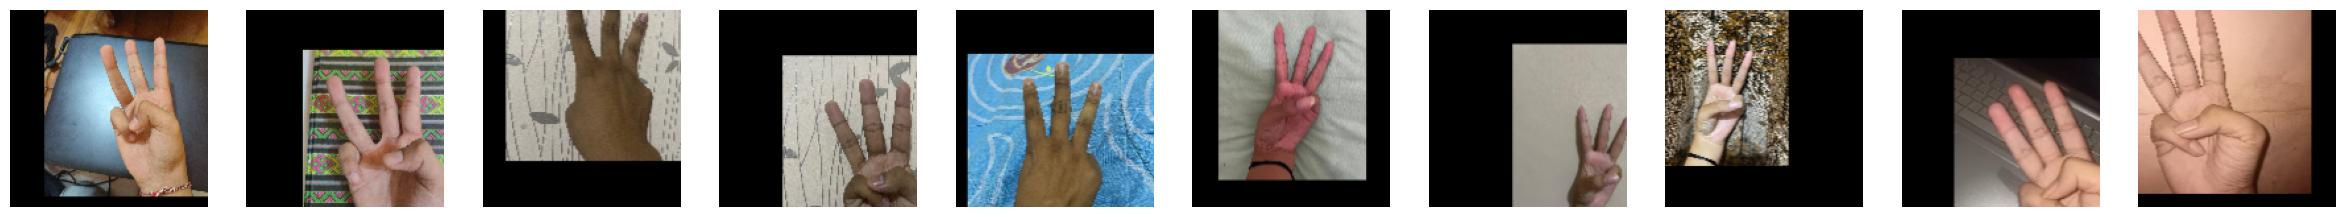

Label: finger_4


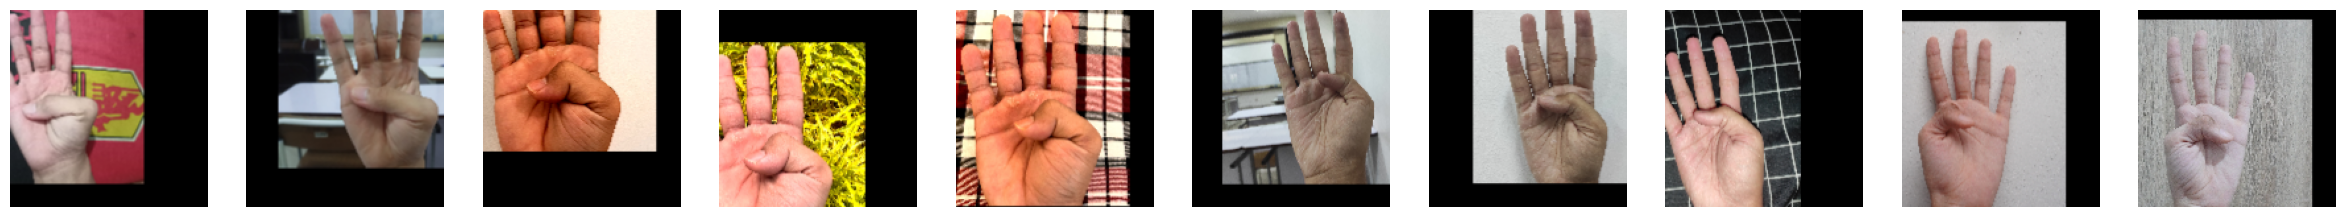

Label: finger_5


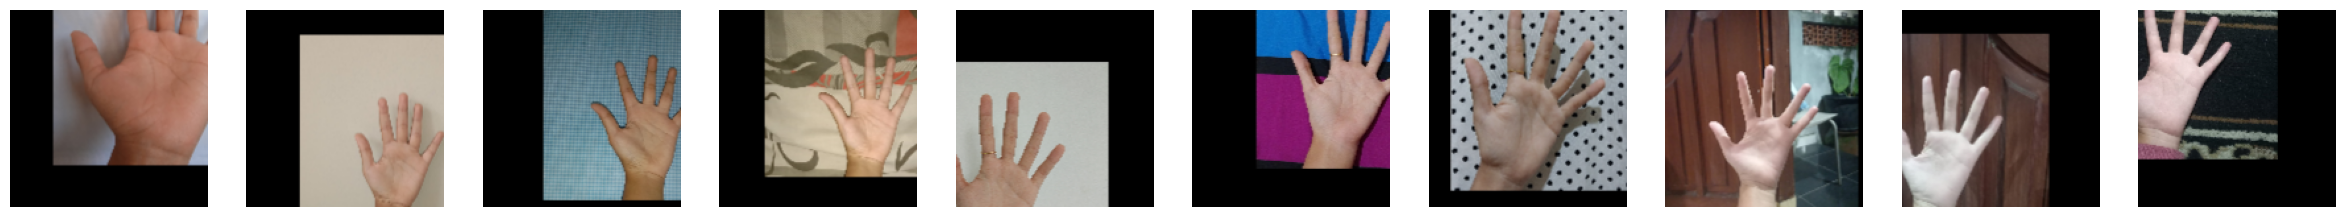

In [5]:
def translate_images(images, max_shift=50):
    translated_images = []
    shifts = []
    
    for img in images:
        height, width = img.shape[:2]
        shift_x = np.random.uniform(-max_shift, max_shift)
        shift_y = np.random.uniform(-max_shift, max_shift)
        translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
        translated_img = cv2.warpAffine(img, translation_matrix, (width, height))
        translated_images.append(translated_img)
        shifts.append((shift_x, shift_y))
    
    return translated_images, shifts

# Contoh penggunaan
# folder_path = "Finger"
# images, filenames, labels = insertGambar(folder_path)
# eksplorasiData(images, labels)

# Translasi gambar
translated_images, shifts = translate_images(images)
print("Perpindahan untuk setiap gambar (x, y):", shifts)

# Tampilkan gambar yang sudah ditranslasi
display_samples(translated_images, labels, num_samples=10)


Kode diatas adalah Fungsi `translate_images` digunakan untuk mentranslasikan gambar-gambar dalam dataset. Dalam setiap iterasi, fungsi menghasilkan dua nilai acak untuk perpindahan horizontal (x) dan vertikal (y). Kemudian, menggunakan matriks transformasi, gambar diterjemahkan sesuai dengan perpindahan yang dihasilkan. Gambar yang telah ditranslasikan disimpan dalam sebuah list, sementara perpindahan yang sesuai disimpan dalam list terpisah. Ini memungkinkan pengguna untuk mengetahui jumlah dan arah perpindahan yang telah diterapkan pada setiap gambar. Setelah proses selesai, fungsi mengembalikan list gambar yang telah ditranslasikan dan list perpindahan yang sesuai.

### Feature Extraction

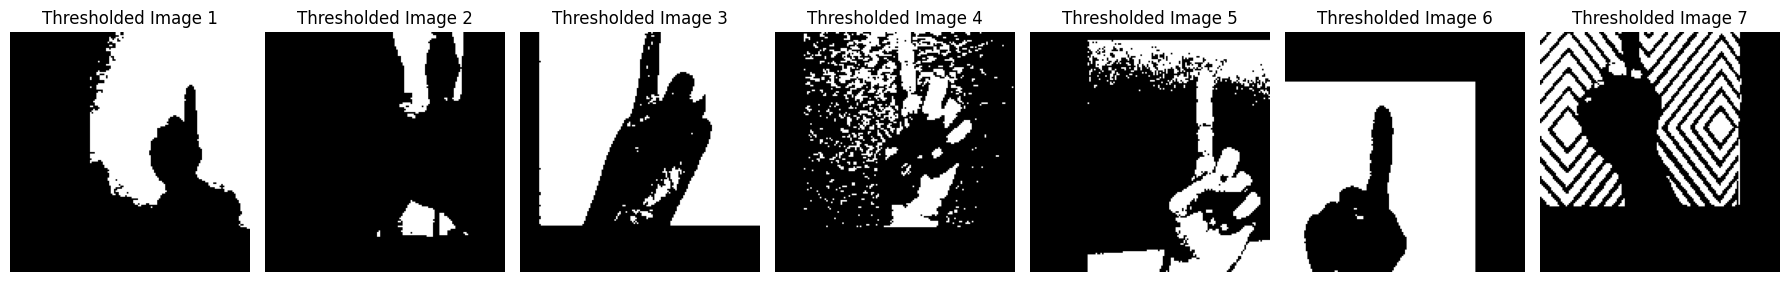

In [6]:
# Proses citra yang telah disimpan dalam variabel dengan thresholding
tresh = []
thresholded_images = []  # Variabel baru untuk menyimpan citra hasil thresholding

for img in translated_images:
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    tresh.append(thresh1)
    
    # Simpan citra hasil threshold ke dalam variabel
    thresholded_images.append(thresh1)

plt.figure(figsize=(18, 10))
for i in range(min(7, len(tresh))):  # Menampilkan hingga 6 gambar hasil thresholding
    plt.subplot(1, 7, i+1)
    plt.imshow(tresh[i], cmap='gray')
    plt.title(f'Thresholded Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Kode di atas melakukan thresholding pada citra-citra yang telah ditranslasikan sebelumnya. Setiap citra diubah menjadi citra grayscale menggunakan cv2.cvtColor, lalu fungsi cv2.threshold digunakan untuk melakukan thresholding biner, yang menghasilkan citra dengan piksel bernilai 0 atau 255 tergantung pada apakah piksel di atas atau di bawah nilai ambang tertentu (dalam kasus ini, 127). Hasil thresholding kemudian disimpan dalam list thresholded_images untuk ditampilkan. Setelah proses selesai, citra hasil thresholding ditampilkan dalam bentuk grid menggunakan plt.subplot, dengan setiap sub-gambar menunjukkan citra hasil thresholding yang sesuai.

In [7]:
def calculate_glcm(edge_image):
    glcm_matrices = []
    angles = [0, 45, 90, 135]
    distances = [1, 2, 3, 4, 5]
    symmetric = True  # Assuming symmetric GLCM
    
    for angle in angles:
        for distance in distances:
            glcm = np.zeros((256, 256))  # Assuming 8-bit images
            rows, cols = edge_image.shape

            for i in range(rows):
                for j in range(cols):
                    # Calculate coordinates for the current pixel and its neighbor
                    current_pixel = edge_image[i, j]
                    neighbor_pixel_x = i + distance * np.cos(np.radians(angle))
                    neighbor_pixel_y = j - distance * np.sin(np.radians(angle))

                    # Ensure neighbor coordinates are within bounds
                    if 0 <= neighbor_pixel_x < rows and 0 <= neighbor_pixel_y < cols:
                        neighbor_pixel = edge_image[int(neighbor_pixel_x), int(neighbor_pixel_y)]
                        glcm[current_pixel, neighbor_pixel] += 1
                        
                        if symmetric:
                            glcm[neighbor_pixel, current_pixel] += 1

            glcm_matrices.append(glcm)
    
    return glcm_matrices

Kode diatas Fungsi `calculate_glcm` digunakan untuk menghitung matriks GLCM (Gray-Level Co-occurrence Matrix) dari citra tepi yang diberikan. Fungsi ini mengiterasi melalui setiap sudut (0, 45, 90, dan 135 derajat) dan setiap jarak (1 hingga 5 piksel) untuk menghitung matriks GLCM untuk setiap kombinasi sudut dan jarak. Di dalam iterasi tersebut, koordinat piksel tetangga dihitung berdasarkan sudut dan jarak, dan kemudian nilai piksel dan tetangganya digunakan untuk mengupdate entri matriks GLCM yang sesuai. Jika simetris, matriks GLCM juga diupdate dengan menukar posisi piksel dan tetangganya. Hasil dari semua matriks GLCM yang dihasilkan kemudian dikumpulkan dalam sebuah list dan dikembalikan.

In [10]:
def calculate_glcm_features(glcm_matrices):
    features = []
    for glcm_matrix in glcm_matrices:
        # Normalisasi matriks GLCM
        glcm_matrix_normalized = glcm_matrix / np.sum(glcm_matrix)
        
        # Hitung fitur
        contrast = np.sum(glcm_matrix_normalized * np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))
        dissimilarity = np.sum(glcm_matrix_normalized * np.abs(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))

        homogeneity = np.sum(glcm_matrix_normalized / (1 + np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1]))))
        energy = np.sum(np.square(glcm_matrix_normalized))
        correlation = np.sum((np.arange(glcm_matrix.shape[0]) - np.mean(glcm_matrix_normalized)) * 
                             (np.arange(glcm_matrix.shape[1]) - np.mean(glcm_matrix_normalized)) * glcm_matrix_normalized / 
                             (np.std(glcm_matrix_normalized) ** 2))
        entropy = -np.sum(glcm_matrix_normalized * np.log(glcm_matrix_normalized + 1e-10))
        asm = np.sum(np.square(glcm_matrix_normalized))
        
        features.append({
            'contrast': contrast,
            'dissimilarity': dissimilarity,
            'homogeneity': homogeneity,
            'energy': energy,
            'correlation': correlation,
            'entropy': entropy,
            'ASM': asm
        })
    return features

Kode diatas adalah Fungsi `calculate_glcm_features` digunakan untuk menghitung fitur dari matriks GLCM yang diberikan. Fungsi ini mengiterasi melalui setiap matriks GLCM dalam daftar, dan untuk setiap matriks GLCM, dilakukan normalisasi matriks tersebut terlebih dahulu. Setelah normalisasi, fitur-fitur seperti kontras, disimilaritas, homogenitas, energi, korelasi, entropi, dan ASM (Angular Second Moment) dihitung menggunakan rumus yang sesuai. Nilai-nilai fitur ini kemudian disimpan dalam bentuk dictionary untuk setiap matriks GLCM, dan semua dictionary fitur ini dikumpulkan dalam sebuah list yang kemudian dikembalikan sebagai output dari fungsi.

In [11]:
# Example usage:
# Assume you have a list of edge images called edge_images_prewitt_rotated
edge_images_prewitt_manual = [
    # Replace with your actual edge images
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

# Calculate GLCM matrices
glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

# Calculate GLCM features
glcm_features = calculate_glcm_features(glcm_matrices)

# Prepare data for DataFrame
data = []
columns = ['Image', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'Entropy', 'ASM']
for angle in [0, 45, 90, 135]:
    columns.extend([f'contrast_{angle}', f'dissimilarity_{angle}', f'homogeneity_{angle}', 
                    f'energy_{angle}', f'correlation_{angle}', f'asm_{angle}', f'entropy_{angle}'])

for i, features in enumerate(glcm_features):
    row = [i + 1, features['contrast'], features['dissimilarity'], features['homogeneity'], 
           features['energy'], features['correlation'], features['entropy'], features['ASM']]
    for angle in [0, 45, 90, 135]:
        row.extend([features['contrast'], features['dissimilarity'], features['homogeneity'], 
                    features['energy'], features['correlation'], features['entropy'], features['ASM']])
    data.append(row)

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display results
print(df)
df.head()

    Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0       1       0.0            0.0          1.0  0.000067  2.755481e+13   
1       2       0.0            0.0          1.0  0.000067  2.778953e+13   
2       3       0.0            0.0          1.0  0.000068  2.728409e+13   
3       4       0.0            0.0          1.0  0.000067  2.763340e+13   
4       5       0.0            0.0          1.0  0.000068  2.714490e+13   
5       6       0.0            0.0          1.0  0.000066  2.804136e+13   
6       7       0.0            0.0          1.0  0.000067  2.776587e+13   
7       8       0.0            0.0          1.0  0.000069  2.670026e+13   
8       9       0.0            0.0          1.0  0.000069  2.670026e+13   
9      10       0.0            0.0          1.0  0.000069  2.662766e+13   
10     11       0.0            0.0          1.0  0.000066  2.804136e+13   
11     12       0.0            0.0          1.0  0.000067  2.778773e+13   
12     13       0.0      

Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0      1       0.0            0.0          1.0  0.000067  2.755481e+13   
1      2       0.0            0.0          1.0  0.000067  2.778953e+13   
2      3       0.0            0.0          1.0  0.000068  2.728409e+13   
3      4       0.0            0.0          1.0  0.000067  2.763340e+13   
4      5       0.0            0.0          1.0  0.000068  2.714490e+13   

    Entropy       ASM  contrast_0  dissimilarity_0  ...  correlation_90  \
0  9.677713  0.000067         0.0              0.0  ...    2.755481e+13   
1  9.684670  0.000067         0.0              0.0  ...    2.778953e+13   
2  9.667752  0.000068         0.0              0.0  ...    2.728409e+13   
3  9.673961  0.000067         0.0              0.0  ...    2.763340e+13   
4  9.661197  0.000068         0.0              0.0  ...    2.714490e+13   

     asm_90  entropy_90  contrast_135  dissimilarity_135  homogeneity_135  \
0  9.677713    0.000067           0.0                0.0              1.0   
1  9.684670    0.000067           0.0                0.0              1.0   
2  9.667752    0.000068           0.0                0.0              1.0   
3  9.673961    0.000067           0.0                0.0              1.0   
4  9.661197    0.000068           0.0                0.0              1.0   

   energy_135  correlation_135   asm_135  entropy_135  
0    0.000067     2.755481e+13  9.677713     0.000067  
1    0.000067     2.778953e+13  9.684670     0.000067  
2    0.000068     2.728409e+13  9.667752     0.000068  
3    0.000067     2.763340e+13  9.673961     0.000067  
4    0.000068     2.714490e+13  9.661197     0.000068  

[5 rows x 36 columns]

Kode diatas adalah fungsi penggunaan yang  memiliki beberapa citra tepi yang disimpan dalam daftar `edge_images_prewitt_manual`. Selanjutnya, kita menghitung matriks GLCM untuk setiap citra menggunakan fungsi `calculate_glcm`, dan kemudian menghitung fitur GLCM untuk matriks-matriks tersebut dengan menggunakan fungsi `calculate_glcm_features`. Setelah itu, kita menyiapkan data untuk DataFrame yang akan berisi fitur-fitur GLCM. Data tersebut diambil dari hasil perhitungan fitur dan disusun sesuai dengan kolom-kolom yang telah ditentukan. DataFrame tersebut kemudian dibuat dan ditampilkan untuk hasil inspeksi.

### Features Selection

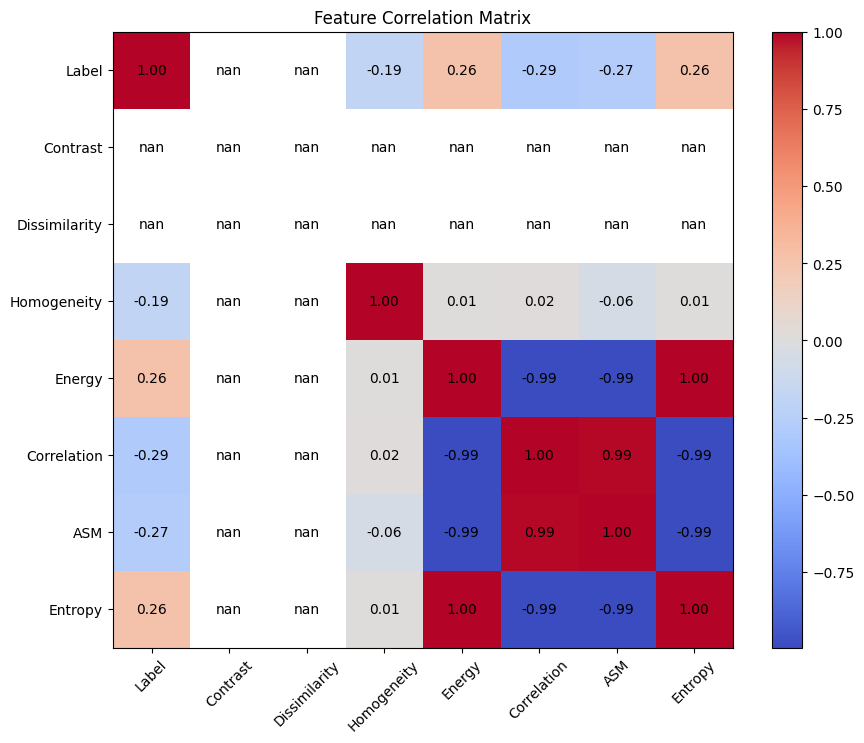

Selected Features: []
Selected Features: []
     Filename  Label  Contrast  Dissimilarity  Homogeneity    Energy  \
0  Filename_0      0       0.0            0.0          1.0  0.000067   
1  Filename_1      1       0.0            0.0          1.0  0.000067   
2  Filename_2     12       0.0            0.0          1.0  0.000068   
3  Filename_3     23       0.0            0.0          1.0  0.000067   
4  Filename_4     34       0.0            0.0          1.0  0.000068   

    Correlation       ASM   Entropy  
0  2.799111e+13  9.685105  0.000067  
1  2.808722e+13  9.685054  0.000067  
2  2.743947e+13  9.668293  0.000068  
3  2.760984e+13  9.671188  0.000067  
4  2.752272e+13  9.665574  0.000068  


In [12]:
def feature_selection_correlation(results_data):
    data_list = []
    columns_list = ['Filename', 'Label', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM', 'Entropy']
    for filename, label, features_dict in results_data:
        row = [filename, label]
        row.extend(features_dict.values())
        data_list.append(row)
    
    df_data = pd.DataFrame(data_list, columns=columns_list)
    
    df_data['Label'] = df_data['Label'].astype('category').cat.codes
    
    numeric_df = df_data.drop(columns=['Filename'])
    
    correlation_matrix = numeric_df.corr()
    
    plt.figure(figsize=(10, 8))
    plt.title("Feature Correlation Matrix")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    
    # Convert index and columns to lists for xticks and yticks
    xticks_labels = list(correlation_matrix.columns)
    yticks_labels = list(correlation_matrix.index)
    
    plt.xticks(range(len(xticks_labels)), xticks_labels, rotation=45)
    plt.yticks(range(len(yticks_labels)), yticks_labels)
    
    for i in range(len(xticks_labels)):
        for j in range(len(yticks_labels)):
            plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')
    plt.show()
    
    selected_features = correlation_matrix['Label'][(correlation_matrix['Label'] > 0.99) | (correlation_matrix['Label'] < -0.99)].index.tolist()
    selected_features.remove('Label')
    
    print("Selected Features:", selected_features)
    
    return df_data, selected_features

# Example usage:
# Assume you have a list of edge images called edge_images_prewitt_manual
edge_images_prewitt_manual = [
    # Replace with your actual edge images
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

# Calculate GLCM matrices
glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

# Calculate GLCM features
glcm_features = calculate_glcm_features(glcm_matrices)

# Prepare data for DataFrame
results_data = []
for i, features in enumerate(glcm_features):
    results_data.append((f'Filename_{i}', f'Label_{i}', features))

# Perform feature selection based on correlation
df_selected, selected_features = feature_selection_correlation(results_data)
print("Selected Features:", selected_features)
print(df_selected.head())

Kode diatas menjelaskan fungsi pertama-tama kita menghasilkan matriks GLCM untuk setiap citra tepi dalam daftar `edge_images_prewitt_manual`, lalu menghitung fitur GLCM untuk matriks-matriks tersebut dengan menggunakan fungsi `calculate_glcm_features`. Data hasil fitur GLCM kemudian disiapkan untuk DataFrame dalam bentuk yang sesuai dengan format yang dibutuhkan oleh fungsi `feature_selection_correlation`. Fungsi `feature_selection_correlation` kemudian digunakan untuk melakukan seleksi fitur berdasarkan korelasi antara fitur-fitur tersebut. Korelasi antara fitur-fitur diplot sebagai matriks korelasi, kemudian fitur yang memiliki korelasi tinggi dengan label (di atas 0.99 atau di bawah -0.99) dipilih dan dicetak. DataFrame hasil seleksi fitur dan fitur-fitur yang terpilih kemudian ditampilkan.

### Splitting Data

In [14]:
def custom_train_test_split(data, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    num_samples = len(data)
    test_indices = np.random.choice(num_samples, int(num_samples * test_size), replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)
    
    X_train = data.iloc[train_indices].drop(columns=['Label'])
    X_test = data.iloc[test_indices].drop(columns=['Label'])
    y_train = data.iloc[train_indices]['Label']
    y_test = data.iloc[test_indices]['Label']
    
    return X_train, X_test, y_train, y_test

# Example usage:
X_train, X_test, y_train, y_test = custom_train_test_split(df_selected, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (32, 8)
Testing data shape: (8, 8)


Kode di atas mendefinisikan fungsi `custom_train_test_split` yang digunakan untuk membagi data menjadi set pelatihan dan pengujian. Fungsi ini mengambil tiga argumen: `data` (DataFrame yang berisi data lengkap termasuk label), `test_size` (proporsi data yang akan dialokasikan untuk set pengujian), dan `random_state` (untuk mengontrol randomness dalam pemilihan data). Jika `random_state` diberikan, random seed akan diatur untuk mereproduksi hasil yang sama. Fungsi ini kemudian menghitung jumlah sampel dalam data dan menggunakan `np.random.choice` untuk memilih indeks acak untuk set pengujian, sementara indeks yang tersisa digunakan untuk set pelatihan. Set pelatihan dan pengujian kemudian dihasilkan dari DataFrame asli dengan menghilangkan kolom 'Label' sebagai fitur dan mengambil 'Label' sebagai target. Hasilnya adalah empat objek: `X_train`, `X_test`, `y_train`, dan `y_test`, yang masing-masing merupakan fitur dan target untuk set pelatihan dan pengujian.

### Normalization

In [15]:
# Definisi data latih dan data uji
X_train = df_selected.iloc[:, 1:]  # Mengambil kolom-kolom kecuali kolom pertama (Filename)
X_test = df_selected.iloc[:, 1:]  # Mengambil kolom-kolom kecuali kolom pertama (Filename)

# Fungsi normalisasi min-max
def min_max_normalization(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

# Normalisasi data latih
X_train_normalized = X_train.copy()
for column in X_train_normalized.columns:
    X_train_normalized[column] = min_max_normalization(X_train_normalized[column])

# Normalisasi data uji
X_test_normalized = X_test.copy()
for column in X_test_normalized.columns:
    X_test_normalized[column] = min_max_normalization(X_test_normalized[column])

# Menampilkan bentuk data yang telah dinormalisasi
print("Bentuk Data Latih Setelah Normalisasi:", X_train_normalized.shape)
print("Bentuk Data Uji Setelah Normalisasi:", X_test_normalized.shape)


Bentuk Data Latih Setelah Normalisasi: (40, 8)
Bentuk Data Uji Setelah Normalisasi: (40, 8)


Dalam kode di atas, kita pertama-tama mendefinisikan `X_train` dan `X_test` dengan mengambil semua kolom kecuali kolom pertama dari DataFrame `df_selected`, yang mewakili fitur-fitur dari data kita. Kemudian, kita mendefinisikan fungsi `min_max_normalization` yang melakukan normalisasi min-max terhadap data yang diberikan. Fungsi ini menghitung nilai minimum dan maksimum dari setiap fitur, dan kemudian menerapkan transformasi min-max ke data dengan menggunakan rumus normalisasi. Setelahnya, kita mengiterasi setiap kolom pada `X_train` dan `X_test`, dan menerapkan normalisasi min-max menggunakan fungsi yang telah kita definisikan sebelumnya. Hasilnya adalah `X_train_normalized` dan `X_test_normalized`, yang merupakan salinan dari `X_train` dan `X_test` yang telah dinormalisasi. Akhirnya, kita mencetak bentuk dari data yang telah dinormalisasi untuk memverifikasi bahwa normalisasi telah berhasil dilakukan.

## Modeling

In [16]:
def standardizeData(images):
    images = np.array(images, dtype=np.float32)
    mean = np.mean(images, axis=(0, 1, 2), keepdims=True)
    std = np.std(images, axis=(0, 1, 2), keepdims=True)
    standardized_images = (images - mean) / std
    return standardized_images

def train_test_split_manual(images, labels, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(images))
    np.random.shuffle(indices)
    split = int(len(images) * (1 - test_size))
    train_indices = indices[:split]
    test_indices = indices[split:]
    X_train = [images[i] for i in train_indices]
    X_test = [images[i] for i in test_indices]
    y_train = [labels[i] for i in train_indices]
    y_test = [labels[i] for i in test_indices]
    return X_train, X_test, y_train, y_test

def normalize_manual(X_train, X_test):
    X_train = np.array(X_train, dtype=np.float32)
    X_test = np.array(X_test, dtype=np.float32)
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    return X_train, X_test

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


# Mengonversi label string menjadi angka
label_map = {label: idx for idx, label in enumerate(set(labels))}
inverse_label_map = {idx: label for label, idx in label_map.items()}
y_numeric = [label_map[label] for label in labels]

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split_manual(images, y_numeric, test_size=0.2, random_state=42)

# Standardisasi data
X_train = np.array(X_train).reshape(len(X_train), -1)
X_test = np.array(X_test).reshape(len(X_test), -1)
X_train, X_test = normalize_manual(X_train, X_test)

# Melatih model SVM
svm_model = SVM()
svm_model.fit(X_train, np.array(y_train).astype(np.float32))

# Prediksi dan evaluasi model
y_pred = svm_model.predict(X_test)
accuracy = np.mean(y_pred == np.where(np.array(y_test) <= 0, -1, 1))

# Mengonversi hasil prediksi kembali ke label string untuk evaluasi
y_pred_labels = [inverse_label_map[0 if pred == -1 else 1] for pred in y_pred]
y_test_labels = [inverse_label_map[actual] for actual in y_test]

print(f"Akurasi model SVM: {accuracy * 100:.2f}%")

Akurasi model SVM: 79.76%


Dalam kode di atas, kita mulai dengan mendefinisikan fungsi `standardizeData` untuk melakukan standardisasi data menggunakan z-score. Fungsi ini menghitung rata-rata dan standar deviasi dari data menggunakan sumbu (axis) yang ditentukan, kemudian mengurangkan rata-rata dan membagi dengan standar deviasi untuk mendapatkan data yang telah distandardisasi. Selanjutnya, kita mendefinisikan fungsi `train_test_split_manual` untuk membagi data menjadi set pelatihan dan pengujian secara manual dengan proporsi yang ditentukan, dan fungsi `normalize_manual` untuk melakukan normalisasi pada set data menggunakan mean dan standar deviasi dari set pelatihan. 

Kemudian, kita mendefinisikan kelas `SVM` yang merupakan implementasi sederhana dari Support Vector Machine (SVM). Metode `fit` dari kelas ini digunakan untuk melatih model SVM menggunakan algoritma gradien turun, sementara metode `predict` digunakan untuk membuat prediksi dengan model yang telah dilatih.

Selanjutnya, kita mengonversi label string menjadi angka menggunakan peta label, membagi data menjadi set pelatihan dan pengujian, dan melakukan standardisasi serta normalisasi manual pada data. Setelahnya, kita melatih model SVM menggunakan data pelatihan yang telah dinormalisasi, melakukan prediksi pada data pengujian, dan menghitung akurasi model. Akhirnya, kita mencetak akurasi model SVM yang telah dilatih.

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Mengonversi label string menjadi angka
label_map = {label: idx for idx, label in enumerate(set(labels))}
y_numeric = [label_map[label] for label in labels]

# Prediksi dan evaluasi model
y_pred = svm_model.predict(X_test)

# Mengonversi hasil prediksi kembali ke label string untuk evaluasi
y_pred_labels = [inverse_label_map[0 if pred == -1 else 1] for pred in y_pred]
y_test_labels = [inverse_label_map[actual] for actual in y_test]

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='macro')
recall = recall_score(y_test_labels, y_pred_labels, average='macro')
f1 = f1_score(y_test_labels, y_pred_labels, average='macro')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Menampilkan hasil evaluasi
print("\nEvaluation Metrics for SVM:")
print("-----------------------------------------------------")
print("| Metric      |        Value                         |")
print("-----------------------------------------------------")
print("| Accuracy    |    {:.4f}                            |".format(accuracy))
print("| Precision   |    {:.4f}                            |".format(precision))
print("| Recall      |    {:.4f}                            |".format(recall))
print("| F1-score    |    {:.4f}                            |".format(f1))
print("-----------------------------------------------------")

# Print the confusion matrix
print("\nConfusion Matrix for SVM:")
print(conf_matrix)



Evaluation Metrics for SVM:
-----------------------------------------------------
| Metric      |        Value                         |
-----------------------------------------------------
| Accuracy    |    0.2810                            |
| Precision   |    0.1337                            |
| Recall      |    0.2808                            |
| F1-score    |    0.1695                            |
-----------------------------------------------------

Confusion Matrix for SVM:
[[37  0  0 35  0]
 [23  0  0 57  0]
 [11  0  0 78  0]
 [10  0  0 81  0]
 [ 6  0  0 82  0]]


c:\Users\ansel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dalam kode diatas, kita menggunakan `sklearn.metrics` untuk menghitung sejumlah metrik evaluasi pada model SVM yang telah dilatih. Pertama, kita mengonversi label string menjadi angka menggunakan peta label yang telah didefinisikan sebelumnya. Selanjutnya, kita melakukan prediksi pada data pengujian dengan model SVM yang telah dilatih sebelumnya.

Setelah itu, kita mengonversi hasil prediksi kembali ke label string untuk keperluan evaluasi. Menggunakan hasil prediksi dan label sebenarnya, kita menghitung nilai akurasi, presisi, recall, dan f1-score menggunakan fungsi-fungsi yang disediakan oleh `sklearn.metrics`. Kemudian, kita membuat confusion matrix menggunakan fungsi `confusion_matrix` dari `sklearn.metrics`.

Terakhir, kita mencetak metrik evaluasi yang dihitung bersama dengan confusion matrix untuk memberikan gambaran keseluruhan tentang kinerja model SVM yang telah dilatih. Metrik evaluasi tersebut meliputi akurasi, presisi, recall, dan f1-score.

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Mengonversi label string menjadi angka
label_map = {label: idx for idx, label in enumerate(set(labels))}
y_numeric = [label_map[label] for label in labels]

# Prediksi dan evaluasi model
y_pred = svm_model.predict(X_test)

# Mengonversi hasil prediksi kembali ke label string untuk evaluasi
y_pred_labels = [inverse_label_map[0 if pred == -1 else 1] for pred in y_pred]
y_test_labels = [inverse_label_map[actual] for actual in y_test]

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='macro', zero_division=0)
recall = recall_score(y_test_labels, y_pred_labels, average='macro', zero_division=0)
f1 = f1_score(y_test_labels, y_pred_labels, average='macro', zero_division=0)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Menampilkan hasil evaluasi
print("\nEvaluation Metrics for SVM:")
print("-----------------------------------------------------")
print("| Metric      |        Value                         |")
print("-----------------------------------------------------")
print("| Accuracy    |    {:.4f}                            |".format(accuracy))
print("| Precision   |    {:.4f}                            |".format(precision))
print("| Recall      |    {:.4f}                            |".format(recall))
print("| F1-score    |    {:.4f}                            |".format(f1))
print("-----------------------------------------------------")

# Print the confusion matrix
print("\nConfusion Matrix for SVM:")
print(conf_matrix)



Evaluation Metrics for SVM:
-----------------------------------------------------
| Metric      |        Value                         |
-----------------------------------------------------
| Accuracy    |    0.2810                            |
| Precision   |    0.1337                            |
| Recall      |    0.2808                            |
| F1-score    |    0.1695                            |
-----------------------------------------------------

Confusion Matrix for SVM:
[[37  0  0 35  0]
 [23  0  0 57  0]
 [11  0  0 78  0]
 [10  0  0 81  0]
 [ 6  0  0 82  0]]


kode diatas menambahkan parameter `zero_division=0` ke dalam pemanggilan fungsi `precision_score`, `recall_score`, dan `f1_score`. Ini dilakukan untuk menangani kasus di mana terjadi pembagian dengan nol dalam perhitungan metrik evaluasi. 

Pada umumnya, parameter ini menentukan nilai yang akan dihasilkan jika terjadi pembagian dengan nol. Dalam kasus ini, kita mengatur nilainya menjadi 0, yang berarti jika terjadi pembagian dengan nol, maka nilai metrik tersebut akan menjadi 0.

Setelah menghitung metrik evaluasi dengan parameter `zero_division=0`, proses berlanjut seperti sebelumnya, yaitu mencetak metrik evaluasi dan confusion matrix untuk memberikan gambaran tentang kinerja model SVM yang telah dilatih. Metrik evaluasi yang dicetak meliputi akurasi, presisi, recall, dan f1-score.

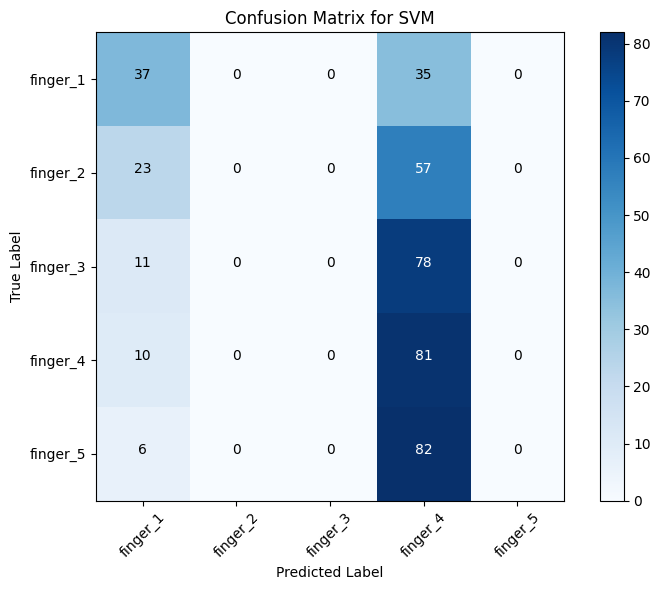

In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Operasi lain yang Anda lakukan sebelumnya

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.colorbar()
tick_marks = np.arange(len(set(y_test_labels)))
plt.xticks(tick_marks, sorted(set(y_test_labels)), rotation=45)
plt.yticks(tick_marks, sorted(set(y_test_labels)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


Kode diatas menambahkan visualisasi untuk confusion matrix yang telah dihasilkan sebelumnya. Pertama, kita membuat sebuah plot menggunakan `plt.imshow` untuk menampilkan matrix sebagai heatmap dengan menggunakan warna dari map warna 'Blues'. Kemudian, kita menambahkan judul, sumbu-x (label prediksi), dan sumbu-y (label asli). 

Kemudian, kita menambahkan teks pada setiap sel confusion matrix menggunakan `plt.text`. Teks ini menunjukkan jumlah prediksi yang benar untuk setiap pasangan label sebenarnya dan prediksi. Jika nilai confusion matrix di suatu sel lebih besar dari setengah nilai maksimum, teksnya akan ditampilkan dengan warna putih; jika tidak, akan ditampilkan dengan warna hitam. 

Dengan visualisasi ini, kita dapat dengan lebih jelas melihat bagaimana model melakukan klasifikasi terhadap masing-masing kelas dan apakah ada kecenderungan untuk salah klasifikasi pada kelas tertentu.